In [1]:
# Use google word2Vec trained model and gensim
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

/home/edgar/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [2]:
# find most similar word
model.most_similar(positive=['espresso'])

[('cappuccino', 0.6888186931610107),
 ('mocha', 0.6686208844184875),
 ('coffee', 0.6616826057434082),
 ('latte', 0.6536753177642822),
 ('caramel_macchiato', 0.6491268873214722),
 ('ristretto', 0.6485545635223389),
 ('espressos', 0.6438628435134888),
 ('macchiato', 0.6428250074386597),
 ('chai_latte', 0.6308028697967529),
 ('espresso_cappuccino', 0.6280542612075806)]

In [3]:
# Word2Vec Math
# A is to B as C is to X:

# check gensim documentation for this
# functions details
# extremely impressive
def A_is_to_B_as_C_is_to(a, b, c, topn=1):
    a,b,c = map(lambda x:x if type(x) == list else [x], (a,b,c))
    res = model.most_similar(positive=b+c, negative=a, topn=topn)
    if len(res):
        if topn == 1:
            return res[0][0]
        return [x[0] for x in res]
    return None

In [4]:
A_is_to_B_as_C_is_to('man', 'woman', 'king')

'queen'

In [5]:
# For finding countries' capitals 
# using relative values
for country in "Italy","France", "India", "China":    
    print("{} is the capital of {}".format(A_is_to_B_as_C_is_to("Germany", "Berlin", country), country))

Rome is the capital of Italy
Paris is the capital of France
Delhi is the capital of India
Beijing is the capital of China


In [6]:
for company in "Google", "IBM", "Boeing", "Microsoft", "Samsung":
    products = A_is_to_B_as_C_is_to(
        ["Starbucks", "Apple"], 
        ["Starbucks_coffee", "iPhone"],
        company,
        topn=3
    )
    
    print("{} -> {}".format(company, ', '.join(products)))

Google -> personalized_homepage, app, Gmail
IBM -> DB2, WebSphere_Portal, Tamino_XML_Server
Boeing -> Dreamliner, airframe, aircraft
Microsoft -> Windows_Mobile, SyncMate, Windows
Samsung -> MM_A###, handset, Samsung_SCH_B###


In [7]:
# Visualizing word embedding
import numpy as np

# t-distributed Stochastic Neighbor Embedding.
from sklearn.manifold import TSNE

# support vector classifier
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score

# import the random library
import random

# plotting
import matplotlib.pyplot as plt

import csv



# geopandas for geography and maps
import geopandas as gpd

beverages = ["espresso", "beer", "vodka", "wine", "cola", "tea", "cappuccino"]
countries = ["Italy", "Germany", "Russia", "France", "USA", "India", "Paraguay"]
sports = ["soccer", "handball", "hockey", "cycling", "basketball", "cricket", "volleyball"]

items = beverages + countries + sports

item_vectors = [(item, model[item]) for item in items if item in model]

In [8]:
print("{} is a vector of {} nodes".format(items[0], model[items[0]].shape[0]))

espresso is a vector of 300 nodes


In [9]:
vectors = np.asarray([x[1] for x in item_vectors])
lengths= np.linalg.norm(vectors, axis=1)
norm_vectors = (vectors.T / lengths).T

# t-distributed Stochastic Neighbor Embedding.
# to reduce high dimensional space onto a plane
tsne = TSNE(n_components=2, perplexity=10, verbose=2).fit_transform(norm_vectors)



[t-SNE] Computing 20 nearest neighbors...
[t-SNE] Indexed 21 samples in 0.000s...
[t-SNE] Computed neighbors for 21 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 0.542792
[t-SNE] Computed conditional probabilities in 0.002s
[t-SNE] Iteration 50: error = 51.1653023, gradient norm = 0.2445077 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 52.7160683, gradient norm = 0.3314100 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 47.6210022, gradient norm = 0.1578530 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 61.8409500, gradient norm = 0.1693976 (50 iterations in 0.007s)
[t-SNE] Iteration 250: error = 77.6688385, gradient norm = 0.2371948 (50 iterations in 0.007s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.668839
[t-SNE] Iteration 300: error = 1.4852906, gradient norm = 0.0011122 (50 iterations in 0.007s)
[t-SNE] Iteration 350: error = 1.1260130, gradient norm = 0.0006959 (50 i

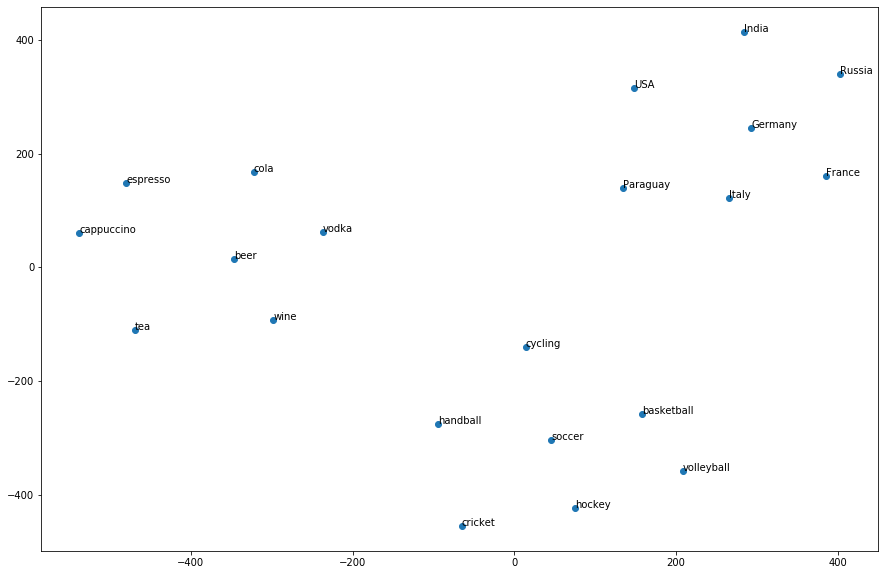

In [10]:
x=tsne[:,0]
y=tsne[:, 1]

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)

for item, x1, y1 in zip(item_vectors, x, y):
    ax.annotate(item[0], (x1, y1))
    
plt.show()

In [11]:
# find subspaces with entities of one class (type)
model.most_similar(positive=["Germany"])



[('Austria', 0.7461062073707581),
 ('German', 0.7178748846054077),
 ('Germans', 0.6628648042678833),
 ('Switzerland', 0.6506868600845337),
 ('Hungary', 0.6504982709884644),
 ('Germnay', 0.649348258972168),
 ('Netherlands', 0.6437496542930603),
 ('Cologne', 0.6430779695510864),
 ('symbol_RSTI', 0.6389946937561035),
 ('Annita_Kirsten', 0.6342948079109192)]

In [12]:
# positive examples of countries
positive = [
    "Chile",
    "Mauritius","Barbados", "Ukraine", "Israel", "Rwanda", "Venezuela", "Lithuania", 
    "Costa_Rica", "Romania", "Senegal", "Canada", "Malasia", "South_Korea", "Australia", "Tunisia", "Armenia",
    "China", "Czech_Republic", "Guinea", "Gambia", "Gabon", "Italy", "Montenegro", "Guyana", "Nicaragua", "French_Guiana",
    "Serbia", "Uruguay", "Ethiopia", "Samoa", "Antarctica", "Suriname", "Finland", "Bermuda", "Cuba", "Oman", "Azerbaijan",
    "Papua", "France", "Tanzania", "Germany"
]


In [13]:
# negative examples
negative = random.sample(model.vocab.keys(), 5000)
negative[:4]
len(negative)

5000

In [14]:
# creating labells for negative examples
labelled = [(p, 1) for p in positive] + [(n, 0) for n in negative]
random.shuffle(labelled)
X = np.asarray([model[w] for w, l in labelled])
y = np.asarray([l for w, l in labelled])

In [15]:
# Training support vector machine to create a separation line for stuff

# 70% of the data
TRAINING_FRACTION = 0.7
cut_off = int(TRAINING_FRACTION * len(labelled))
clf = svm.SVC(kernel='linear')
clf.fit(X[:cut_off], y[:cut_off])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
res = clf.predict(X[cut_off:])

x_testing = X[cut_off:]
y_testing = y[cut_off:]


# pretty high accuracy
accuracy_score(y_testing, res)

0.9993390614672836

In [17]:
res = clf.predict(X[cut_off:])

missed = [country for (pred, truth, country) in 
 zip(res, y[cut_off:], labelled[cut_off:]) if pred != truth]

100 - 100 * float(len(missed)) / len(res), missed

(99.93390614672836, [('Haiti', 0)])

In [18]:
# pretty high f1 score
f1_score(y_testing, res, average='macro') 

0.9780943693987172

In [19]:
all_predictions = clf.predict(model.syn0)

/home/edgar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [20]:
res = []
for word, pred in zip(model.index2word, all_predictions):
    if pred:
        res.append(word)
        if len(res) == 150:
            break
random.sample(res, 10)

['Ecuador',
 'Somalia',
 'Guantanamo',
 'Czech_Republic',
 'Norway',
 'Haiti',
 'Congo',
 'Croatia',
 'Dutch',
 'Gaza_Strip']

In [21]:
# Find the most relevant item from a classa of a given criterion

# country_to_idx = {country['name']}
countries = list(csv.DictReader(open('countries.csv')))
countries[:10]

[OrderedDict([('name', 'Canada'), ('cc', 'ca'), ('cc3', 'can')]),
 OrderedDict([('name', 'Turkmenistan'), ('cc', 'tm'), ('cc3', 'tkm')]),
 OrderedDict([('name', 'Ethiopia'), ('cc', 'et'), ('cc3', 'eth')]),
 OrderedDict([('name', 'Swaziland'), ('cc', 'sz'), ('cc3', 'swz')]),
 OrderedDict([('name', 'Czech_Republic'), ('cc', 'cz'), ('cc3', 'cze')]),
 OrderedDict([('name', 'Cameroon'), ('cc', 'cm'), ('cc3', 'cmr')]),
 OrderedDict([('name', 'UAE'), ('cc', 'ae'), ('cc3', 'are')]),
 OrderedDict([('name', 'Liberia'), ('cc', 'lr'), ('cc3', 'lbr')]),
 OrderedDict([('name', 'Netherlands'), ('cc', 'nl'), ('cc3', 'nld')]),
 OrderedDict([('name', 'East_Timor'), ('cc', 'tl'), ('cc3', 'tls')])]

In [22]:
country_to_idx = {country['name']: idx for idx, country in enumerate(countries)}
country_vecs = np.asarray([model[c['name']] for c in countries])
country_vecs.shape

(184, 300)

In [23]:

# which countries are more like canada

dists = np.dot(country_vecs, country_vecs[country_to_idx['Canada']])
for idx in reversed(np.argsort(dists)[-10:]):
    print(countries[idx]['name'], dists[idx])

Canada 7.544024
New_Zealand 3.9619699
Finland 3.9392405
Puerto_Rico 3.838145
Jamaica 3.8102937
Sweden 3.8042789
Slovakia 3.7038739
Australia 3.671101
Bahamas 3.6240416
United_States 3.537434


In [24]:
def rank_countries(term, topn=10, field='name'):
    print(term)
    if not term in model:
        return []
    vec = model[term]
    dists = np.dot(country_vecs, vec)
    return [(countries[idx][field], float(dists[idx]))
        for idx in reversed(np.argsort(dists)[-topn:])]

In [25]:
# pretty cool trick!!
rank_countries('cricket')

cricket


[('Sri_Lanka', 5.92276668548584),
 ('Zimbabwe', 5.336524963378906),
 ('Bangladesh', 5.192488670349121),
 ('Pakistan', 4.948408126831055),
 ('Guyana', 3.9162840843200684),
 ('Barbados', 3.757995128631592),
 ('India', 3.7504398822784424),
 ('South_Africa', 3.6561501026153564),
 ('New_Zealand', 3.64202880859375),
 ('Fiji', 3.608567714691162)]

In [26]:
# Visuallzing country on a Map
# visualize country rankings from an experiment on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


coffee


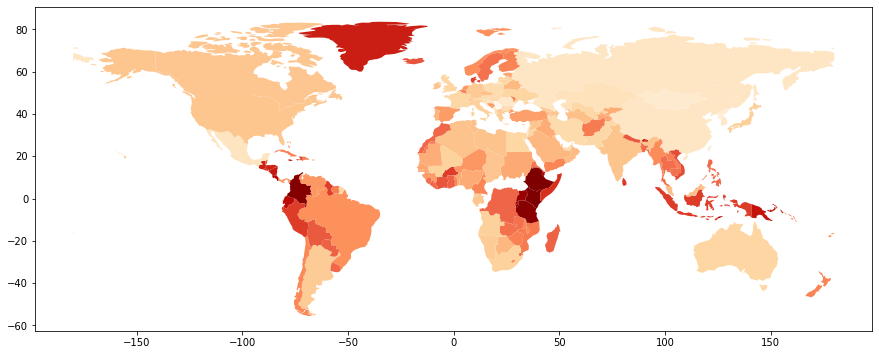

In [34]:
def map_term(term):
    d = {k.upper(): v for k, v in rank_countries(term, topn=0, field='cc3')}
    world[term] = world['iso_a3'].map(d)
    world[term] /= world[term].max()
    world.dropna().plot(term, cmap='OrRd', figsize=(15, 12))
map_term('coffee')
    

In [35]:
for country in rank_countries():

coffee
[('Ethiopia', 1.9432250261306763), ('Kenya', 1.9391343593597412), ('Colombia', 1.9116393327713013), ('Burundi', 1.885450839996338), ('Tanzania', 1.883944034576416), ('Uganda', 1.7865114212036133), ('East_Timor', 1.7661278247833252), ('Rwanda', 1.7186616659164429), ('Djibouti', 1.670926570892334), ('Costa_Rica', 1.6578598022460938)]
